In [3]:
import numpy as np
from qiskit import *
import scipy
import pylab

from qiskit.visualization import plot_histogram

In [9]:
def ansatz(theta):
    ansatzz = QuantumCircuit(2)
    ansatzz.rx(np.pi/2, 0)
    ansatzz.ry(np.pi/2, 1)
    ansatzz.cx(1,0)
    ansatzz.rz(float(theta),0)
    ansatzz.cx(1,0)
    ansatzz.rx(np.pi/2, 0)
    ansatzz.ry(-np.pi/2, 1)
    ansatz = ansatzz.to_gate()
    ansatz.name = "$\Psi(\Theta)$" 
    return ansatz

In [10]:
g=np.array([[2.1868, 0.5449, -1.2870, 0.6719, 0.0798, 0.0798],[0.7381, 0.4325, -0.7355, 0.6233, 0.0846, 0.0846], 
[0.2252, 0.3435, -0.4347, 0.5716, 0.0910, 0.0910], [-0.0172, 0.2779, -0.2550, 0.5235, 0.0986, 0.0986], 
[-0.1452, 0.2286, -0.1413, 0.4812, 0.1067, 0.1067], [-0.2165, 0.1908, -0.0666, 0.4451, 0.1149, 0.1149], 
[-0.2573, 0.1615, -0.0166, 0.4148, 0.1226, 0.1226], [-0.2812, 0.1390, 0.0171, 0.3898, 0.1297 , 0.1297]])

In [11]:
R=np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

# backend = statevector_simulator

In [53]:
def measure_function(ansatz_theta):
    measure_circ = QuantumCircuit(2)
    measure_circ.append(ansatz_theta, range(2))
    measure_circ.barrier()
#    if gates=="ZI":
#       pass
#    elif gates=="IZ":
#        pass
#    elif gates=="ZZ":
#        pass
#    elif gates=="XX":
#        pass
#        measure_circ.ry(-np.pi/2,0)
#        measure_circ.ry(-np.pi/2,1)
#    elif gates=="YY":
#        pass
#        measure_circ.rx(np.pi/2,0)
#        measure_circ.rx(np.pi/2,1)
#    else:
#        raise NotImplemented()
#    measure_circ.measure_all()
    
    return measure_circ    

In [55]:
def calc_average(Operator1, Operator2,func):
    average=np.real(np.dot(np.dot(func, np.kron(Operator2,Operator1)),np.conj(func)))
    return average

In [56]:
Zg=np.array([[1,0],[0,-1]])
Xg=np.array([[0,1],[1,0]])
Yg=np.array([[0,-1j],[1j,0]])
Ig=np.array([[1,0],[0,1]])

In [58]:
def energy_stat_sim(theta):    
    backend = BasicAer.get_backend('statevector_simulator')
    E=np.zeros(5)
    ansatz_theta=ansatz(theta)  
    circuitt0 = measure_function(ansatz_theta)
    result0 = execute(circuitt0, backend).result()
    vect0  = result0.get_statevector(circuitt0, decimals=3)
    E[0]=g[r,1]*calc_average(Zg,Ig,vect0)
    E[1]=g[r,2]*calc_average(Ig,Zg,vect0)
    E[2]=g[r,3]*calc_average(Zg,Zg,vect0)
    E[3]=g[r,4]*calc_average(Xg,Xg,vect0)
    E[4]=g[r,5]*calc_average(Yg,Yg,vect0)
    Esum=np.sum(E)
    Esum
    return Esum

In [59]:
Energy_stat_sim=np.zeros(len(R))
for r in range(len(R)):
    ans=scipy.optimize.minimize(fun=energy_stat_sim, x0=0.0, method='COBYLA',tol=10**(-4))
    Energy_stat_sim[r]=ans.fun+g[r,0]

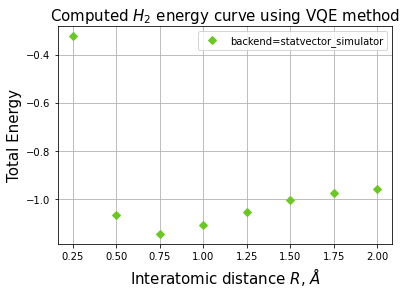

In [71]:
pylab.plot(R,Energy_stat_sim,'D',color=[107/255,200/255,35/255], linewidth=5, label='backend=statvector_simulator')
pylab.xlabel('Interatomic distance $R$, $\AA$', fontsize=15)
pylab.ylabel('Total Energy', fontsize=15)
pylab.grid()
pylab.title("Computed $H_2$ energy curve using VQE method", fontsize=15)
pylab.legend(loc='upper right')

# backend = qasm_simulator

In [12]:
def measure_function_q(ansatz_theta, gates):
    measure_circ = QuantumCircuit(2)
    measure_circ.append(ansatz_theta, range(2))
    measure_circ.barrier()
    if gates=="ZI":
       pass
    elif gates=="IZ":
        pass
    elif gates=="ZZ":
        pass
    elif gates=="XX":
#        pass
        measure_circ.ry(-np.pi/2,0)
        measure_circ.ry(-np.pi/2,1)
    elif gates=="YY":
#        pass
        measure_circ.rx(np.pi/2,0)
        measure_circ.rx(np.pi/2,1)
    else:
        raise NotImplemented()
    measure_circ.measure_all()
    
    return measure_circ    

In [62]:
def getzero(dictt):
    if not "00" in dictt:
        dictt["00"]=0
    if not "01" in dictt:
        dictt["01"]=0
    if not "10" in dictt:
        dict["10"]=0
    if not "11" in dictt:
        dictt["11"]=0
    return dictt
#dict.get("00",0)

In [63]:
def energy_stat_qasm(theta):    
    backend = BasicAer.get_backend('qasm_simulator')
    E=np.zeros(5)
    ansatz_theta=ansatz(0.2) 
    shots_number=6000
    circuit0 = measure_function_q(ansatz_theta, "ZI")
    result0 = execute(circuit0, backend, shots=shots_number).result()
    counts0  = getzero(result0.get_counts(circuit0))
    E[0]=g[r,1]*(counts0['00']+counts0['10']-counts0['01']-counts0['11'])/shots_number
    circuit1 = measure_function_q(ansatz_theta, "IZ")
    result1 = execute(circuit1, backend, shots=shots_number).result()
    counts1  = getzero(result1.get_counts(circuit1))
    E[1]=g[r,2]*(counts1["00"]-counts1["10"]+counts1["01"]-counts1["11"])/shots_number
    circuit2 = measure_function_q(ansatz_theta, "ZZ")
    result2 = execute(circuit2, backend, shots=shots_number).result()
    counts2  = getzero(result2.get_counts(circuit2))
    E[2]=g[r,3]*(counts2["00"]-counts2["10"]-counts2["01"]+counts2["11"])/shots_number
    circuit3 = measure_function_q(ansatz_theta, "XX")
    result3 = execute(circuit3, backend, shots=shots_number).result()
    counts3  = getzero(result3.get_counts(circuit3))
    E[3]=g[r,4]*(counts3["00"]-counts3["10"]-counts3["01"]+counts3["11"])/shots_number
    circuit4 = measure_function_q(ansatz_theta, "YY")
    result4 = execute(circuit4, backend, shots=shots_number).result()
    counts4  = getzero(result4.get_counts(circuit4))  
    E[4]=g[r,5]*(counts4["00"]-counts4["10"]-counts4["01"]+counts4["11"])/shots_number
    Esum=np.sum(E)
    Esum
    return Esum

In [64]:
Energy=np.zeros(len(g))
for r in range(len(g)):
    ans=scipy.optimize.minimize(fun=energy_stat_qasm, x0=0.0, method='COBYLA',tol=10**(-4))
    Energy[r]=ans.fun+g[r,0]

In [70]:
pylab.plot(R,Energy,'D',color=[1/255,10/255,86/255], linewidth=5, label='backend=qasm_simulator')
pylab.xlabel('Interatomic distance $R$, $\AA$', fontsize=15)
pylab.ylabel('Total Energy', fontsize=15)
pylab.grid()
pylab.title("Computed $H_2$ energy curve using VQE method", fontsize=15)
pylab.legend(loc='upper right')

# Let's compare result with different backend

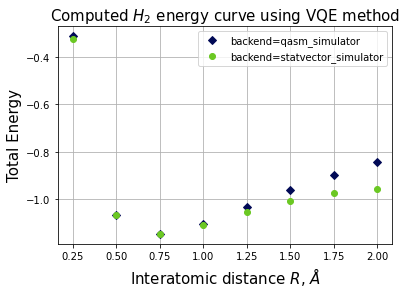

In [69]:
pylab.plot(R,Energy,'D',color=[1/255,10/255,86/255], linewidth=5, label='backend=qasm_simulator')
pylab.plot(R,Energy_stat_sim,'o',color=[107/255,200/255,35/255], linewidth=5, label='backend=statvector_simulator')
pylab.xlabel('Interatomic distance $R$, $\AA$', fontsize=15)
pylab.ylabel('Total Energy', fontsize=15)
pylab.grid()
pylab.title("Computed $H_2$ energy curve using VQE method", fontsize=15)
pylab.legend(loc='upper right')

In [1]:
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import QasmSimulator

In [4]:
IBMQ.save_account('b0f74fb2019408fc9231fef2c26e3c053f46155ecff981446e138e0b514099c0496085a86b8fac8caba5bbd85d03a80c32102369b8b43fa312f7734bb274c405',overwrite=True )

In [6]:
device_backend = FakeVigo()
provider = IBMQ.load_account()
vigo_backend = provider.get_backend('ibmq_vigo')
#vigo_simulator = QasmSimulator.from_backend(vigo_backend)

ibmqfactory.load_account:WARNING:2020-12-07 17:59:06,810: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
def energy_stat_noise(theta):    
    backend = BasicAer.get_backend('qasm_simulator')
    E=np.zeros(5)
    ansatz_theta=ansatz(0.2) 
    circuit_noise0 = measure_function_q(ansatz_theta, "ZI")
    result0 = execute(circuit_noise0,vigo_backend).result()
    counts0  = result0.get_counts(circuit_noise0)
    E[0]=g[r,1]*(counts0['00']+counts0['10']-counts0['01']-counts0['11'])
    circuit_noise1 = measure_function_q(ansatz_theta, "IZ")
    result1 = execute(circuit_noise1, vigo_backend).result()
    counts1  = result1.get_counts(circuit_noise1)
    E[1]=g[r,2]*(counts1["00"]-counts1["10"]+counts1["01"]-counts1["11"])
    circuit_noise2 = measure_function_q(ansatz_theta, "ZZ")
    result2 = execute(circuit_noise2, vigo_backend).result()
    counts2  = result2.get_counts(circuit_noise2)
    E[2]=g[r,3]*(counts2["00"]-counts2["10"]-counts2["01"]+counts2["11"])
    circuit_noise3 = measure_function_q(ansatz_theta, "XX")
    result3 = execute(circuit_noise3,vigo_backend).result()
    counts3  = result3.get_counts(circuit_noise3)
    E[3]=g[r,4]*(counts3["00"]-counts3["10"]-counts3["01"]+counts3["11"])
    circuit_noise4 = measure_function_q(ansatz_theta, "YY")
    result4 = execute(circuit_noise4, vigo_backend).result()
    counts4  = result4.get_counts(circuit_noise4)  
    E[4]=g[r,5]*(counts4["00"]-counts4["10"]-counts4["01"]+counts4["11"])
    Esum=np.sum(E)
    Esum
    return Esum

In [ ]:
Energy_noise=np.zeros(len(g))
for r in range(len(g)):
    ans=scipy.optimize.minimize(fun=energy_stat_noise, x0=0.0, method='COBYLA',tol=10**(-4))
    Energy[r]=ans.fun+g[r,0]

In [14]:
Energy_noise

array([0., 0., 0., 0., 0., 0., 0., 0.])